# Chapter 5 - Resampling Methods Exercise

#### Student ID: B082040005

#### Name: 高念慈

## Conceptual

### Q1: We now review bootstrap method.

(a) Assume that we obtain a simple random sample (sample without replacement) from a set of n observation with sample size being $m$. What is the probability that the first sampled observation is *not* the $j$th observation from the original set? What is the probability that neither the first nor the second sampled observation is the $j$th observation from the original set?

> Ans:   $\frac{n-1}{n}$
```
由於所有觀察結果都具有相同的選擇機會（等概率事件），
因此我們正在尋找的概率只是有利案例的數量除以可能案例的總數。

也就是說，除第 j 個觀察之外的 n-1 個觀察除以 n 個總觀察。
```
> Ans:   $\frac{n-1}{n}\times\frac{n-2}{n-1}=\frac{n-2}{n}$

(b) Assume that we obtain a bootstrap sample from a set of n observation. What is the probability that the first bootstrap observation is *not* the $j$th observation from the original set? What is the probability that neither the first nor the second bootstrap observation is the $j$th observation from the original set?

> Ans:   $\frac{n-1}{n}$
```
由於我們使用重抽進行採樣，因此一切都與(a)相同
因此，當我們進行觀察時，我們的觀察集由所有初始觀察組成

因此，從 n 個可能的觀察中，n-1 個觀察對應於我們想要計算的概率
```
> Ans:   $\frac{n-1}{n}\times\frac{n-1}{n}=(\frac{n-1}{n})^2$

(c) Which sampling method is used to find a random subset from the data sample, simple random sample or bootstrap sample? Which sampling method is used to find a new random sample that approximate the true population, simple random sample or bootstrap sample?

> Ans:  1. simple random sample
```
在進行抽樣時不摻入任何人為因素 。
母體的每一個體都有同等的機會被選中，
且每次抽選與此次之前的歷次抽選無關
```
> Ans:  2. bootstrap sample
```
鬆散地基於大數定律，該定律指出，
如果您一遍又一遍地抽樣，您的數據應該接近真實的人口數據。
即使您使用單個樣本來生成數據，這也可能令人驚訝。
```

(d) If we obtain a bootstrap sample from a set of n observation, what is the probability that the $j$th observation is *not* in the bootstrap sample?

> Ans:  $\frac{n-1}{n}\times\frac{n-1}{n}...\times\frac{n-1}{n}=(\frac{n-1}{n})^n=(1-\frac{1}{n})^n$

```
這些事件是獨立的。
也就是說，在第二個觀察中選擇第 j 個觀察的概率
不取決於它是否在第一個觀察中被選擇，依此類推。
```

(e) If we obtain a bootstrap sample from a extremely large set of observation, what is the probability that the $j$th observation is in the bootstrap sample? Write the probability using $1$ and $e$. (Hint: Something related to $e^{-1}$.)

> Ans:  $1 - e^{-1}$

$1-lim_{n\to\infty}(1-\frac{1}{n})^n = 1-lim_{n\to\infty}(1+\frac{-1}{n})^n = 1 - e^{-1}\approx1-0.368=0.632$

假設給定的數據集包含 n 個樣本。<br>
該數據集有放回地抽樣 n 次，產生 n 個樣本的訓練集。<br><br>
顯然每個樣本被選中的概率是 1/n，因此未被選中的概率就是 (1-1/n)，<br>
這樣一個樣本在訓練集中沒出現的概率就是 n 次都未被選中的概率，<br><br>
即 $(1-\frac{1}{n})^n$ <br>
當 n 趨於無窮大時，這一概率就將趨近於 $e^{-1}=0.368$，<br>
所以留在訓練集中的樣本大概就占原來數據集的 63.2%

### Q2: We now review cross-validation.

Two types of cross-validation can be distinguished (區分): exhaustive (窮舉) and non-exhaustive cross-validation.
Exhaustive cross-validation methods refer to methods that try all possible ways to divide the original sample into a training and a validation set, while non-exhaustive cross validation methods try only several possible ways.

(a) For validation set approach (holdout 保留 method), k-fold, and LOOCV, which of the cross-validation method are exhaustive?

> Ans:   LOOCV & k-fold，when k=n

(b) When we implement k-fold cross-validation, how many non-overlapping equal parts do we need to devided into?

> Ans:  $1<k\leq n$，經驗為 5 或 10

(c) Which of the cross-validation is the fastest and which is the slowest between validation set approach, k-fold, and LOOCV?

> Ans:  the fastest : k-fold；the slowest : LOOCV ，k=n 時相等

(d) Which of the cross-validation may tends to overestimate the test error, k-fold or validation set approach?

 > Ans:  validation set approach，因為使用觀察值較少

(e) Which of the cross-validation has less bias but more variance, validation set approach or LOOCV?

 > Ans:  LOOCV

## Applied

### Q3: We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

In [751]:
import pandas as pd
import math

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import LeaveOneOut  # To use cross-validation in (c); only available after scikit v0.17.1
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm  # To fit models using least squares

%matplotlib inline

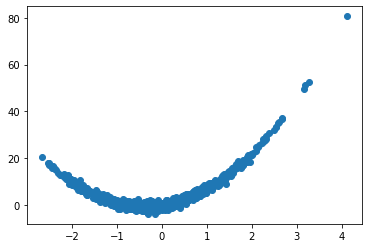

In [752]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

x = np.sort(np.random.normal(size=1000))        # (1000,)
y = 3*x + 4*x**2 + np.random.normal(size=1000)
# x = x.reshape(-1,1)                             # (1000, 1)
plt.scatter(x, y)

Write out the model used to generate the data in equation form.

 > Ans:  $Y = 3X + 4X^2+\epsilon$

(b) Compute the $\operatorname{LOOCV}$ errors from the following four models using least squares:

> 1. Y = $\beta_0+\beta_1X+\epsilon$<br>
> 2. Y = $\beta_0+\beta_1X+\beta_2X^2+\epsilon$<br>
> 3. Y = $\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$<br>
> 4. Y = $\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\beta_4X^4+\epsilon$.

*Note that you can only modify (修改) code that have been underlined.*

In [753]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate,cross_val_score,LeaveOneOut

# __________You_can_use_whatever_package_you_need__________
# cross_validate, cross_val_score, or LeaveOneOut in sklearn.model_selection is recommended.
# sm or smf is available if you do not like sklearn.

In [754]:
np.random.seed(42)

In [755]:
# Create LOOCV object
loo = LeaveOneOut()

In [756]:
# Organize data into a dataframe (easier to handle)
df = pd.DataFrame({'x':x, 'y':y})                   # (1000,)

In [757]:
error = []

# Compute mean squared error (MSE) for the different polynomial equations.
for i in range(1, 4+1): # i is the number of models
    # Leave-one-out cross validation 
    for train, test in loo.split(df):
        X_train = df['x'][train]
        y_train = df['y'][train]
        X_test = df['x'][test]
        y_test = df['y'][test]
        
        X_train = X_train.values.reshape(-1,1)
        X_test = X_test.values.reshape(-1,1)
        
        # Pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
                      ('linear', LinearRegression())]) 
        model.fit(X_train, y_train)

        # MSE
        score = mean_squared_error(y_test, model.predict(X_test))
        error.append(score)
        
    print('For the model {} , MSE is {}'.format(i, error),'\n\n')
    print('Model %i (MSE): %f' % (i,np.mean(error)),'\n\n')
    error = []

For the model 1 , MSE is [659.0256600707728, 520.7668638405263, 474.94113926828766, 507.531741991591, 400.46713402485295, 448.5748863007664, 397.89104250794423, 391.0816061631066, 368.86193901729473, 303.02030956122667, 277.7862264165544, 275.2372144381486, 274.08095585553684, 285.20474075601504, 243.83572853521693, 207.68318744033937, 231.70087463690388, 210.2622430090358, 225.08559904607503, 236.111446165858, 255.17036032757775, 151.017334506028, 175.16365736132428, 181.11015198122243, 202.15569693244993, 196.41473524448767, 179.06543674598933, 194.84588023745778, 158.878903304713, 157.42871649255252, 171.6480933736034, 131.5437432659396, 182.86244653614088, 112.95026863413669, 104.88447188858665, 133.0615236434526, 76.58612335544379, 101.71129299059687, 104.49918078485075, 128.3864154182705, 169.0731082398285, 101.47187381967942, 69.8091166340703, 95.89353226996805, 99.53913369930787, 67.16679295087874, 85.21824067228928, 107.5251993290726, 84.88814069275067, 57.79094771220698, 59.8

For the model 2 , MSE is [0.017946813595995027, 0.08275189688739469, 0.4439823665239925, 0.08401898035993256, 0.6286923770594183, 0.2722789746395997, 0.056728861579431994, 0.034437413763042955, 0.047479743784389704, 0.6541441235913874, 0.35579280908399497, 0.03973561242463421, 0.1598234440805304, 0.8014364266210243, 0.01079568241753057, 0.5379963402121036, 0.03790647145620574, 0.004438471535828389, 0.5094976703263873, 1.3652323244379994, 3.6621764298512596, 2.8892624106616447, 0.2694691751867393, 0.013788191863245106, 0.5493604820123863, 0.40506344379077003, 0.0002798574823963048, 0.5326106818435212, 0.351802775798179, 0.164956992241047, 0.06905762476775043, 1.2255581840532614, 2.3644211961750923, 0.683543421976732, 1.3574400086259168, 0.08269855910390601, 3.780939174903695, 0.21104175909654543, 0.03802445111950153, 1.575573999928128, 9.141233877981906, 0.02136325457203063, 1.7224331315817374, 0.056394393022452444, 0.41310962336201607, 0.8857138598749845, 0.10599146499387715, 2.4312831

For the model 3 , MSE is [0.022665311656062222, 0.09202599160870124, 0.4495097506905684, 0.09307576459401357, 0.6351289145821107, 0.28943288399070477, 0.054586029492209066, 0.03815734077763186, 0.05168302026924987, 0.6561204914135246, 0.3543487526387344, 0.0381050340543786, 0.16587596958384107, 0.8197121896285442, 0.00992494959114137, 0.5363706084319827, 0.03998780702696927, 0.003938111824791519, 0.5188783056427156, 1.3840348458501, 3.70168154615455, 2.8953845794189315, 0.2673344140446479, 0.013045534822271032, 0.557647092067972, 0.4116603655126889, 0.00040801666244425205, 0.5402779156195906, 0.3496509592397429, 0.16314296291653546, 0.07102752623423272, 1.2239745807151643, 2.380385905921941, 0.6813964418232373, 1.3554261899210849, 0.08421022853992138, 3.7801095260745536, 0.20964260328076387, 0.03736556583484894, 1.5818774407843226, 9.16253610875742, 0.021862768241913993, 1.7202926599908586, 0.05713091595877622, 0.41515860529352505, 0.884014724957416, 0.10679191896303802, 2.436012437846

For the model 4 , MSE is [0.00021628566437704078, 0.045337157118836464, 0.6144513584154028, 0.047532606128757406, 0.7840731808755185, 0.22213910385251315, 0.093519929947912, 0.018142231870512518, 0.02988859628945762, 0.7462710528576533, 0.4066439780589354, 0.05363907013125741, 0.14278724345247032, 0.7714807298072465, 0.01606237624386121, 0.5713422419240337, 0.03189013726426622, 0.006579852982488546, 0.496289124222995, 1.349043731374585, 3.6491774923486133, 2.947358703100983, 0.2809121578902563, 0.01583694548934469, 0.5417309002733254, 0.39872319447779525, 9.91609412135908e-05, 0.5267851269047459, 0.3607617993144652, 0.1694690281001088, 0.06735384640239757, 1.2362392641929607, 2.37374061266996, 0.6802998025905262, 1.3533000476846693, 0.08519309320694371, 3.7635638689110853, 0.20509004301673822, 0.035239663391892696, 1.6001228805196006, 9.21046791617247, 0.024203757265637046, 1.6981324374326692, 0.06163142834130299, 0.42840532384666674, 0.8644601394220521, 0.1145679073481729, 2.475187070

- Model 1 (MSE): 37.675933 
- Model 2 (MSE): 0.952658 
- Model 3 (MSE): 0.953745 
- Model 4 (MSE): 0.954113 

In [758]:
error

[]

In [759]:
X_train.shape # (999,) # ValueError：預期的 2D 數組，得到 1D 數組

(999, 1)

(c) Repeat (b) using another random seed. Are your results the same as what you got in (c)? Why?  

*Note that the code that have been underlined may be the same as the code in* (b)*.*

In [760]:
np.random.seed(1)

error = []

# Compute mean squared error (MSE) for the different polynomial equations.
for i in range(1, 4+1): # i is the number of models
    # Leave-one-out cross validation 
    for train, test in loo.split(df):
        X_train = df['x'][train]
        y_train = df['y'][train]
        X_test = df['x'][test]
        y_test = df['y'][test]
        
        X_train = X_train.values.reshape(-1,1)
        X_test = X_test.values.reshape(-1,1)
        
        # Pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree = i)),
                      ('linear', LinearRegression())]) 
        model.fit(X_train, y_train)

        # MSE
        score = mean_squared_error(y_test, model.predict(X_test))
        error.append(score)
        
    print('For the model {} , MSE is {}'.format(i, error),'\n\n')
    print('Model %i (MSE): %f' % (i,np.mean(error)),'\n\n')
    error = []

For the model 1 , MSE is [659.0256600707728, 520.7668638405263, 474.94113926828766, 507.531741991591, 400.46713402485295, 448.5748863007664, 397.89104250794423, 391.0816061631066, 368.86193901729473, 303.02030956122667, 277.7862264165544, 275.2372144381486, 274.08095585553684, 285.20474075601504, 243.83572853521693, 207.68318744033937, 231.70087463690388, 210.2622430090358, 225.08559904607503, 236.111446165858, 255.17036032757775, 151.017334506028, 175.16365736132428, 181.11015198122243, 202.15569693244993, 196.41473524448767, 179.06543674598933, 194.84588023745778, 158.878903304713, 157.42871649255252, 171.6480933736034, 131.5437432659396, 182.86244653614088, 112.95026863413669, 104.88447188858665, 133.0615236434526, 76.58612335544379, 101.71129299059687, 104.49918078485075, 128.3864154182705, 169.0731082398285, 101.47187381967942, 69.8091166340703, 95.89353226996805, 99.53913369930787, 67.16679295087874, 85.21824067228928, 107.5251993290726, 84.88814069275067, 57.79094771220698, 59.8

For the model 2 , MSE is [0.017946813595995027, 0.08275189688739469, 0.4439823665239925, 0.08401898035993256, 0.6286923770594183, 0.2722789746395997, 0.056728861579431994, 0.034437413763042955, 0.047479743784389704, 0.6541441235913874, 0.35579280908399497, 0.03973561242463421, 0.1598234440805304, 0.8014364266210243, 0.01079568241753057, 0.5379963402121036, 0.03790647145620574, 0.004438471535828389, 0.5094976703263873, 1.3652323244379994, 3.6621764298512596, 2.8892624106616447, 0.2694691751867393, 0.013788191863245106, 0.5493604820123863, 0.40506344379077003, 0.0002798574823963048, 0.5326106818435212, 0.351802775798179, 0.164956992241047, 0.06905762476775043, 1.2255581840532614, 2.3644211961750923, 0.683543421976732, 1.3574400086259168, 0.08269855910390601, 3.780939174903695, 0.21104175909654543, 0.03802445111950153, 1.575573999928128, 9.141233877981906, 0.02136325457203063, 1.7224331315817374, 0.056394393022452444, 0.41310962336201607, 0.8857138598749845, 0.10599146499387715, 2.4312831

For the model 3 , MSE is [0.022665311656062222, 0.09202599160870124, 0.4495097506905684, 0.09307576459401357, 0.6351289145821107, 0.28943288399070477, 0.054586029492209066, 0.03815734077763186, 0.05168302026924987, 0.6561204914135246, 0.3543487526387344, 0.0381050340543786, 0.16587596958384107, 0.8197121896285442, 0.00992494959114137, 0.5363706084319827, 0.03998780702696927, 0.003938111824791519, 0.5188783056427156, 1.3840348458501, 3.70168154615455, 2.8953845794189315, 0.2673344140446479, 0.013045534822271032, 0.557647092067972, 0.4116603655126889, 0.00040801666244425205, 0.5402779156195906, 0.3496509592397429, 0.16314296291653546, 0.07102752623423272, 1.2239745807151643, 2.380385905921941, 0.6813964418232373, 1.3554261899210849, 0.08421022853992138, 3.7801095260745536, 0.20964260328076387, 0.03736556583484894, 1.5818774407843226, 9.16253610875742, 0.021862768241913993, 1.7202926599908586, 0.05713091595877622, 0.41515860529352505, 0.884014724957416, 0.10679191896303802, 2.436012437846

For the model 4 , MSE is [0.00021628566437704078, 0.045337157118836464, 0.6144513584154028, 0.047532606128757406, 0.7840731808755185, 0.22213910385251315, 0.093519929947912, 0.018142231870512518, 0.02988859628945762, 0.7462710528576533, 0.4066439780589354, 0.05363907013125741, 0.14278724345247032, 0.7714807298072465, 0.01606237624386121, 0.5713422419240337, 0.03189013726426622, 0.006579852982488546, 0.496289124222995, 1.349043731374585, 3.6491774923486133, 2.947358703100983, 0.2809121578902563, 0.01583694548934469, 0.5417309002733254, 0.39872319447779525, 9.91609412135908e-05, 0.5267851269047459, 0.3607617993144652, 0.1694690281001088, 0.06735384640239757, 1.2362392641929607, 2.37374061266996, 0.6802998025905262, 1.3533000476846693, 0.08519309320694371, 3.7635638689110853, 0.20509004301673822, 0.035239663391892696, 1.6001228805196006, 9.21046791617247, 0.024203757265637046, 1.6981324374326692, 0.06163142834130299, 0.42840532384666674, 0.8644601394220521, 0.1145679073481729, 2.475187070

> Ans:  <br>結果完全相同，因為我們只從訓練集中刪除了一個觀察值。<br>因此，用於測試集的觀察不會產生隨機效應。<br> LOOCV 將始終相同，無論隨機種子如何。
- Model 1 (MSE): 37.675933 
- Model 2 (MSE): 0.952658 
- Model 3 (MSE): 0.953745 
- Model 4 (MSE): 0.954113 

(d) Which of the models in (b) had the smallest $\operatorname{LOOCV}$ error? Is this what you expected?

> Ans:  <br>
LOOCV 誤差最小的模型是模型 2。<br>這是預期的結果，<br>模型 2 ，因為他具有與 y 相同的形式（二階多項式）

有可能 LOOCV 誤差最小的模型是模型 3。<br>這不是預期的結果，<br>本來預期模型 2 ，因為他具有與 y 相同的形式（二階多項式）；<br>可能是因為模型 3 跟模型 2 形式沒差太多，<br>卻又比他多了彈性，讓他能更好的擬合<br><br>
加上 epsilon 值與 y 方程中的其餘值成比例更高。<br>因此，它的影響更大，隨機效應優於二階參數 y。

In [761]:
# Models with polynomial features
min_deg = 1  
max_deg = 4+1 

for i in range(min_deg, max_deg):
    pol = PolynomialFeatures(degree = i)
    X_pol = pol.fit_transform(df['x'][:,np.newaxis])
    y = df['y']

    model = sm.OLS(y, X_pol)
    results = model.fit()

    print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     311.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           7.85e-61
Time:                        01:31:55   Log-Likelihood:                -3226.7
No. Observations:                1000   AIC:                             6457.
Df Residuals:                     998   BIC:                             6467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0521      0.193     20.973      0.0

<ipython-input-761-993caeef9875>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pol = pol.fit_transform(df['x'][:,np.newaxis])
<ipython-input-761-993caeef9875>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pol = pol.fit_transform(df['x'][:,np.newaxis])
<ipython-input-761-993caeef9875>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pol = pol.fit_transform(df['x'][:,np.newaxis])
<ipython-input-761-993caeef9875>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array 

```
我們應該注意每個係數的 t 統計量值。

正如我們所看到的，當我們有一個二階多項式時，x1 和 x2 都具有高 t 統計值。
當我們有一個三階多項式時，x2 具有最高的 t 統計量，其次是 x1，然後是 x3。
最後，當我們有一個四階多項式時，x2 是具有最高 t 統計量的變量，其次是 x1、x4 和 x3。

我們可以得出結論，x2 和 x1 是與所呈現模型相關的變量。
這些結果與基於交叉驗證結果得出的結論一致，表明一階和二階項是最顯著的。
```

(e) <span style="color:red">Bonus(加分題)</span>. Compute the errors from the model with the smallest LOOCV error in (b) using K-fold with shuffle and without shuffle. Comment on what you found.

In [762]:
np.random.seed(42)

##  the smallest LOOCV

In [767]:
# Organize data into a dataframe (easier to handle)
df = pd.DataFrame({'x':x, 'y':y})                   # (1000,)

# Create LOOCV object
loo = LeaveOneOut()

error = []

# Compute mean squared error (MSE) for the different polynomial equations.
# for i in range(1, 4+1): # i is the number of models
    # Leave-one-out cross validation 
for train, test in loo.split(df):
    X_train = df['x'][train]
    y_train = df['y'][train]
    X_test = df['x'][test]
    y_test = df['y'][test]
        
    X_train = X_train.values.reshape(-1,1)
    X_test = X_test.values.reshape(-1,1)
        
    # Pipeline
    model = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('linear', LinearRegression())]) 
    model.fit(X_train, y_train)

    # MSE
    score = mean_squared_error(y_test, model.predict(X_test))
    error.append(score)
        
# print('For the model {} , MSE is {}'.format(i, error),'\n\n')
print('Model %i (MSE): %f' % (2,np.mean(error)),'\n\n')
error = []

Model 2 (MSE): 0.952658 




In [768]:
from sklearn.model_selection import KFold 

In [769]:
# Organize data into a dataframe (easier to handle)
df = pd.DataFrame({'x':x, 'y':y})                   # (1000,)

## K-fold without shuffle

In [772]:
kf = KFold(n_splits=5, random_state=None, shuffle=False)
kf.get_n_splits(x)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [779]:
error = []

for train_index, test_index in kf.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    
    # Pipeline
    model = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('linear', LinearRegression())]) 
    model.fit(X_train, y_train)

    # MSE
    score = mean_squared_error(y_test, model.predict(X_test))
    error.append(score)
        
# print('For the model {} , MSE is {}'.format(i, error),'\n\n')
print('Model %i (MSE): %f' % (2,np.mean(error)),'\n\n')
error = []

Model 2 (MSE): 1.009220 




## K-fold with shuffle

In [780]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(x)
print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [781]:
error = []

for train_index, test_index in kf.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    
    # Pipeline
    model = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('linear', LinearRegression())]) 
    model.fit(X_train, y_train)

    # MSE
    score = mean_squared_error(y_test, model.predict(X_test))
    error.append(score)
        
# print('For the model {} , MSE is {}'.format(i, error),'\n\n')
print('Model %i (MSE): %f' % (2,np.mean(error)),'\n\n')
error = []

Model 2 (MSE): 0.953020 




```
random state,很多函数里面都有这一个param，只有当shuffle=True的时候，才有意义。
因为只有随机起来，每次结果不一样，为了重现，才利用seed.
如果shuffle=False，每次split都是按照顺序来划分，想要重现无非就是重新运行一下罢了。
但是shuffle,每次的运行结果都不一样，所以才需要random_state.
```

> Ans:  <br>同模型下，the smallest LOOCV、K-fold with shuffle的結果差不多<br>
K-fold without shuffle 就出現一點落差<br>
不過還是可以發現 K-fold在速度上明顯勝過LOOCV，且差距其實不大，<br>
做個幾次K-fold with shuffle的效果還能降低方差讓模型更穩定，<br>
而K-fold without shuffle 在固定切割區塊的情況下，就比較難變化，本身方差也大
```
如果數據以某種方式按類排序，則“洗牌”主要有用，
因為每個折疊可能只包含來自一個類的樣本（特別是對於隨機梯度體面分類器排序的類是危險的）。
對於其他分類器，它應該沒有區別。如果改組非常不穩定，則您的參數選擇可能是無用的（又名垃圾）
```

### Q4: 寫一個可以 bootstrap 的函數，<span style="color:red">禁止使用套件中現成的 bootstrap function</span> 。

這題的用意是讓大家知道 bootstrap sample 以及 bootstrap estimate 是怎麼得到的，之後便可用得到的 bootstrap estimate 計算 bootstrap statistics 或 bootstrap estimators。這題滿分條件是下面的 block 沒跑錯誤，基本上函數定義下面那堆程式碼只是讓大家方便檢查程式哪裡有錯的。  
*Note that you can only modify code that have been underlined.*

In [223]:
import numpy as np
import pandas as pd
import random
from sklearn.utils import resample

In [731]:
def bootstrap(data, stat_func, n_boots=999):
    """
    Give a bootstrap sample

    Parameters
    ----------
    data : sequence of array-like
        Each element of data is a sample from an underlying distribution.
    statistic : callable
        Statistic or estimator for each bootstrap samples to be calculated.
    n_resamples : int, optional
        The number of resamples performed to form the bootstrap distribution of the statistic or estimator.

    Returns
    -------
    data : list
        A list that contain all bootstrap estimates.

    """
    if type(n_boots)!=int:
        raise TypeError("n_boots should be a Integer")
    
    n = (len(data))
    boot_estimate = np.repeat(0., n_boots)  # 在 Python 中宣告變數後可直接指定一個特定值, 其變數型態自動設定為設定值的型態
                                            # 你是不是前面已經讓 np.array([ooo,ooo,ooo...]) 放入了整數 變成整個 array都是整數呢?
    for i in range(0,n_boots):
        boot = resample(data, n_samples = n, replace = True)   #抽一組大小n的樣本  ### n_samples = 要打
        boot_estimate[i] = stat_func(boot)
    return(([boot_estimate]))   

In [732]:
bootstrap(x,n_boots = 1000,stat_func = np.mean)

[array([-1.03654401e-01, -3.34522077e-02, -4.23659070e-02, -9.48329023e-02,
        -3.07761756e-02, -1.57669975e-02, -2.29662967e-02, -2.74636930e-02,
        -8.02644753e-02, -6.35935219e-02,  1.44656184e-02, -6.20674629e-02,
        -1.22524854e-01, -3.64276919e-02,  3.16148201e-02, -4.07451982e-02,
        -7.51407544e-02, -6.64533329e-02, -5.16962183e-02, -6.61616512e-02,
        -4.76108333e-02, -3.53360990e-02, -9.41887386e-02, -8.79846584e-02,
        -5.19354332e-02, -3.76374671e-02, -1.59091676e-02,  2.06207476e-02,
        -2.24342159e-02, -4.01774051e-02, -7.83614270e-02, -6.44656816e-02,
        -1.21855710e-01, -3.25175221e-02, -2.79589045e-03,  1.78606053e-04,
        -7.77497361e-02, -1.55620945e-02, -6.46608854e-02, -9.37232939e-02,
        -3.32428879e-02, -5.78965244e-02,  4.15217694e-04, -2.43835153e-03,
        -6.01080532e-02, -2.86987678e-02, -2.31226861e-02, -2.00545727e-02,
        -4.05023065e-02, -9.45007720e-02, -6.19362466e-02, -6.62649376e-02,
        -5.8

In [712]:
data = resample(x1, n_samples = 1, replace = True)
data

[[9, 'j']]

In [711]:
boot_estimate = np.repeat(0., 5)
boot_estimate

array([0., 0., 0., 0., 0.])

In [730]:
boot_estimate[0]=np.array(data, dtype=object) 

ValueError: setting an array element with a sequence.

In [735]:
np.random.seed(4)

x1 = [[i, chr(i+97)] for i in range(26)]
x1.extend([[14, chr(14+97)] for i in range(26)])
x2 = np.array(x1)
x3 = pd.DataFrame(x1, columns=['x','y'])


def mode(data):
    return data[np.unique(data[0], return_counts=True)[1].argmax()]


def test_function1(position):
    def the_j_word(data):
        return data[position][1]
    return the_j_word


def test_function2(data):
    return mode(data)[1]


def test_function3(data):
    return data.sample(1)['y']


print(mode(bootstrap(x1, stat_func=test_function1(3), n_boots=999)))
print(mode(bootstrap(x2, stat_func=test_function2, n_boots=999)))
print(mode(bootstrap(x3, stat_func=test_function3, n_boots=999)))

ValueError: could not convert string to float: 'o'

In [737]:
data = x1
data

[[0, 'a'],
 [1, 'b'],
 [2, 'c'],
 [3, 'd'],
 [4, 'e'],
 [5, 'f'],
 [6, 'g'],
 [7, 'h'],
 [8, 'i'],
 [9, 'j'],
 [10, 'k'],
 [11, 'l'],
 [12, 'm'],
 [13, 'n'],
 [14, 'o'],
 [15, 'p'],
 [16, 'q'],
 [17, 'r'],
 [18, 's'],
 [19, 't'],
 [20, 'u'],
 [21, 'v'],
 [22, 'w'],
 [23, 'x'],
 [24, 'y'],
 [25, 'z'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o'],
 [14, 'o']]

In [738]:
from scipy.stats import bootstrap
import numpy as np

#convert array to sequence
data = (data,)

#calculate 95% bootstrapped confidence interval for median
bootstrap_ci = bootstrap(data, test_function1(3), confidence_level=0.95,
                         random_state=1, method='percentile')
bootstrap_ci

ImportError: cannot import name 'bootstrap' from 'scipy.stats' (C:\Users\user\anaconda3\lib\site-packages\scipy\stats\__init__.py)

提示: 使用 sklearn.utils 的 resample 可以避免 resample 上的麻煩問題。  

random 套件的 choices 會使物件格式會跑掉，而且使用在 pandas 物件會出問題。  
np.random.choice 只能用在 1-d array 上。  
pd.DataFrame.sample 或 pandas.Series.sample 是只有 pandas 物件才有的 classmethod。  
生成亂數再用 indices 索引的方法適用於 numpy，但對 pandas 便不適用。因為 pandas 的數值索引是用 data.iloc。

In [63]:
import numpy as np
import pandas as pd
import random
from sklearn.utils import resample

x1 = [[i, chr(97+i)] for i in range(4)]
x2 = np.array(x1)
x3 = pd.DataFrame(x1, columns=['x','y'])


def print_data_and_type(data):
    print(data, type(data))

    
print_data_and_type(x1)
print_data_and_type(x2)
print_data_and_type(x3)

[[0, 'a'], [1, 'b'], [2, 'c'], [3, 'd']] <class 'list'>
[['0' 'a']
 ['1' 'b']
 ['2' 'c']
 ['3' 'd']] <class 'numpy.ndarray'>
   x  y
0  0  a
1  1  b
2  2  c
3  3  d <class 'pandas.core.frame.DataFrame'>


In [64]:
print_data_and_type(random.choices(x2, k=10))

[array(['1', 'b'], dtype='<U11'), array(['3', 'd'], dtype='<U11'), array(['0', 'a'], dtype='<U11'), array(['3', 'd'], dtype='<U11'), array(['3', 'd'], dtype='<U11'), array(['1', 'b'], dtype='<U11'), array(['0', 'a'], dtype='<U11'), array(['2', 'c'], dtype='<U11'), array(['2', 'c'], dtype='<U11'), array(['3', 'd'], dtype='<U11')] <class 'list'>


In [188]:
rnd_indices = (np.random.choice(len(x1), size=10, replace=True))
x1_data = np.array(x1)[rnd_indices]
x1_data 

array([['2', 'c'],
       ['1', 'b'],
       ['2', 'c'],
       ['0', 'a'],
       ['1', 'b'],
       ['3', 'd'],
       ['1', 'b'],
       ['1', 'b'],
       ['1', 'b'],
       ['1', 'b']], dtype='<U11')

In [192]:
random.sample(x1,4) # 抽出不放回

[[0, 'a'], [3, 'd'], [1, 'b'], [2, 'c']]

In [67]:
print_data_and_type(resample(x1, n_samples=10, replace=True))
print_data_and_type(resample(x2, n_samples=10, replace=True))
print_data_and_type(resample(x3, n_samples=10, replace=True))

[[1, 'b'], [3, 'd'], [0, 'a'], [0, 'a'], [3, 'd'], [1, 'b'], [3, 'd'], [1, 'b'], [3, 'd'], [0, 'a']] <class 'list'>
[['0' 'a']
 ['1' 'b']
 ['0' 'a']
 ['3' 'd']
 ['1' 'b']
 ['0' 'a']
 ['2' 'c']
 ['1' 'b']
 ['2' 'c']
 ['0' 'a']] <class 'numpy.ndarray'>
   x  y
2  2  c
1  1  b
2  2  c
0  0  a
3  3  d
0  0  a
2  2  c
0  0  a
1  1  b
2  2  c <class 'pandas.core.frame.DataFrame'>
